In [95]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [96]:
#read data file 
df_repo = pd.read_csv("repositories_github.csv")
df_repo.head(5)

Unnamed: 0                              full_name  private   
0           0  redteamguides/redteamguides.github.io    False  \
1           1            JellyApple102/easyread.nvim    False   
2           2                           chshersh/zbg    False   
3           3                  NordSecurity/libtelio    False   
4           4                      opensaucerer/barf    False   

                                         description            created_at   
0                                    Red Team Guides  2023-03-14T07:51:43Z  \
1                   bioniclike reading inside Neovim  2023-03-14T06:23:32Z   
2                                  Zero bullshit git  2023-03-14T21:21:40Z   
3  A library providing networking utilities for N...  2023-03-14T10:04:44Z   
4  Barf is basically a remarkable framework for b...  2023-03-14T04:46:32Z   

             updated_at   size  stargazers_count language  open_issues_count   
0  2023-06-19T18:28:00Z  23309               116     HTML                  0  \
1  2023-06-19T19:34:39Z  22340               114      Lua                  0   
2  2023-06-22T05:48:41Z    363               114    OCaml                 14   
3  2023-06-21T23:48:04Z    928                90     Rust                  3   
4  2023-06-19T01:50:42Z    102                86       Go                  4   

   ...    owner_type                                       Contributors   
0  ...          User     ['rezaduty', 'redteamrecipe', 'redteamguides']  \
1  ...          User                       ['JellyApple102', 'JKubovy']   
2  ...          User            ['chshersh', 'tekknoid', 'paulpatault']   
3  ...  Organization  ['stalowyjez', 'tomaszklak', 'Jauler', 'jjanow...   
4  ...          User   ['opensaucerer', 'Adedaramola', 'sdressler-now']   

                             nombre_contribution max_contribution   
0                                     [44, 9, 2]               44  \
1                                        [30, 1]               30   
2                                     [41, 1, 1]               41   
3  [45, 35, 35, 19, 17, 10, 7, 7, 3, 3, 3, 2, 1]               45   
4                                     [34, 6, 2]               34   

  max_contributeur                                          Languages   
0         rezaduty  ['HTML', 'CSS', 'JavaScript', 'Shell', 'Docker...  \
1    JellyApple102                                            ['Lua']   
2         chshersh                           ['OCaml', 'Standard ML']   
3       stalowyjez  ['Rust', 'C', 'Go', 'C#', 'SWIG', 'Java', 'Mak...   
4     opensaucerer                                 ['Go', 'Makefile']   

                                         frequencies max_frequency   
0   [62134.0, 33954.0, 5034.0, 3869.0, 217.0, 175.0]       62134.0  \
1                                           [4546.0]        4546.0   
2                                  [26762.0, 3383.0]       26762.0   
3  [1140626.0, 141434.0, 65718.0, 20704.0, 17124....     1140626.0   
4                                   [65082.0, 220.0]       65082.0   

   most_frequent_language wtache  
0                    HTML    6.0  
1                     Lua    2.0  
2                   OCaml    3.0  
3                    Rust   10.0  
4                      Go    4.0  

[5 rows x 21 columns]

In [97]:
df_repo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7708 entries, 0 to 7707
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7708 non-null   int64  
 1   full_name               7708 non-null   object 
 2   private                 7708 non-null   bool   
 3   description             7609 non-null   object 
 4   created_at              7708 non-null   object 
 5   updated_at              7708 non-null   object 
 6   size                    7708 non-null   int64  
 7   stargazers_count        7708 non-null   int64  
 8   language                7708 non-null   object 
 9   open_issues_count       7708 non-null   int64  
 10  forks_count             7708 non-null   int64  
 11  owner_type              7708 non-null   object 
 12  Contributors            7708 non-null   object 
 13  nombre_contribution     7708 non-null   object 
 14  max_contribution        7708 non-null   

In [98]:
#modify data type of some columns 
df_repo["created_at"] = pd.to_datetime(df_repo['created_at'])
df_repo["updated_at"] = pd.to_datetime(df_repo['updated_at'])
df_repo["max_contribution"].replace("empty", 0, inplace=True)
df_repo["max_contribution"] = df_repo["max_contribution"].astype(int)

In [99]:
#drop some useless column 
df_repo.drop("Unnamed: 0", axis= 1, inplace = True)

In [100]:
df_repo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7708 entries, 0 to 7707
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   full_name               7708 non-null   object             
 1   private                 7708 non-null   bool               
 2   description             7609 non-null   object             
 3   created_at              7708 non-null   datetime64[ns, UTC]
 4   updated_at              7708 non-null   datetime64[ns, UTC]
 5   size                    7708 non-null   int64              
 6   stargazers_count        7708 non-null   int64              
 7   language                7708 non-null   object             
 8   open_issues_count       7708 non-null   int64              
 9   forks_count             7708 non-null   int64              
 10  owner_type              7708 non-null   object             
 11  Contributors            7708 non-null   obj

In [101]:
#search for null values
df_repo.isnull().sum()

full_name                  0
private                    0
description               99
created_at                 0
updated_at                 0
size                       0
stargazers_count           0
language                   0
open_issues_count          0
forks_count                0
owner_type                 0
Contributors               0
nombre_contribution        0
max_contribution           0
max_contributeur           0
Languages                  0
frequencies                0
max_frequency             30
most_frequent_language     0
wtache                    29
dtype: int64

In [102]:
#drop rows with null values 
df_repo.dropna(axis=0, inplace=True)

#drop duplicated rows
df_repo.drop_duplicates(inplace = True, ignore_index=True)

# Languages

In [103]:
df_repo['language'].replace('Jupyter Notebook', 'Python', inplace=True)
#df_repo['language'].replace('Scala', 'Java', inplace=True)
#df_repo['language'].replace('C++', 'C', inplace=True)
#df_repo['language'].replace('TypeScript','JavaScript', inplace=True)
#df_repo['language'].replace("HTML", 'JavaScript', inplace=True)
#df_repo['language'].replace('CSS','JavaScript', inplace=True )

In [104]:
df_repo['most_frequent_language'].replace('Jupyter Notebook', 'Python', inplace=True)
#df_repo['most_frequent_language'].replace('Scala', 'Java', inplace=True)
#df_repo['most_frequent_language'].replace('C++', 'C', inplace=True)
#df_repo['most_frequent_language'].replace('TypeScript','JavaScript', inplace=True)
#df_repo['most_frequent_language'].replace("HTML", 'JavaScript', inplace=True)
#df_repo['most_frequent_language'].replace('CSS','JavaScript', inplace=True )

In [105]:
df_langues = df_repo["language"].value_counts()
df_dominantes = df_repo["most_frequent_language"].value_counts()

In [106]:
print(len(df_langues.values))
print(len(df_dominantes.values))

120
122


In [107]:
df_langues.head(10)

language
Python        2257
TypeScript    1128
JavaScript     787
Go             333
Rust           322
C++            305
Java           262
C#             239
C              188
Kotlin         187
Name: count, dtype: int64

In [108]:
df_dominantes.head(10)

most_frequent_language
Python        2259
TypeScript    1129
JavaScript     782
Go             332
Rust           323
C++            304
Java           262
C#             238
C              189
Kotlin         188
Name: count, dtype: int64

          col1      col2
col1  1.000000  0.999996
col2  0.999996  1.000000


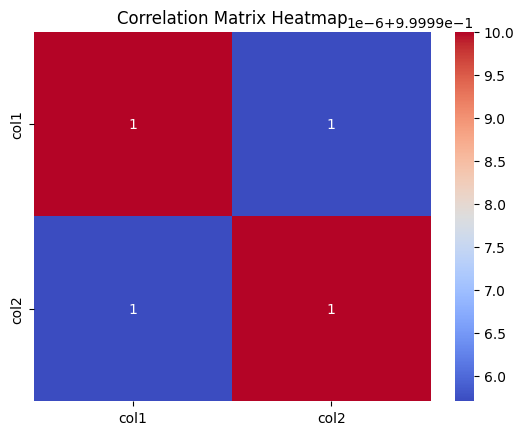

In [109]:
data = { 'col1' : df_langues.values[:120],
         'col2' : df_dominantes.values[:120]
     }
df1 = pd.DataFrame(data)

correlation = df1.corr()
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

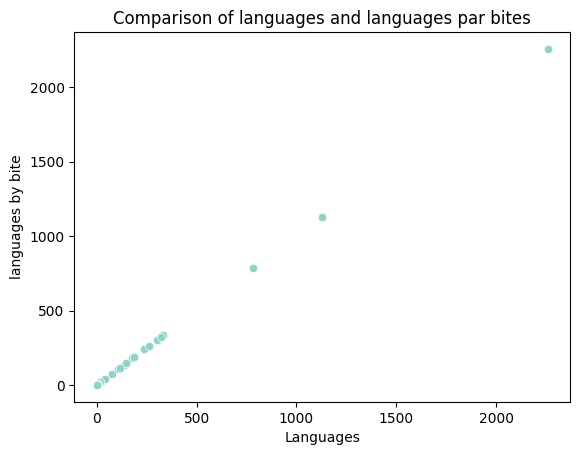

In [110]:
# Create a scatter plot
sns.scatterplot(x=df_dominantes, y=df_langues)

# Add labels and title
plt.xlabel('Languages')
plt.ylabel('languages by bite')
plt.title('Comparison of languages and languages par bites')

# Show the plot
plt.show()

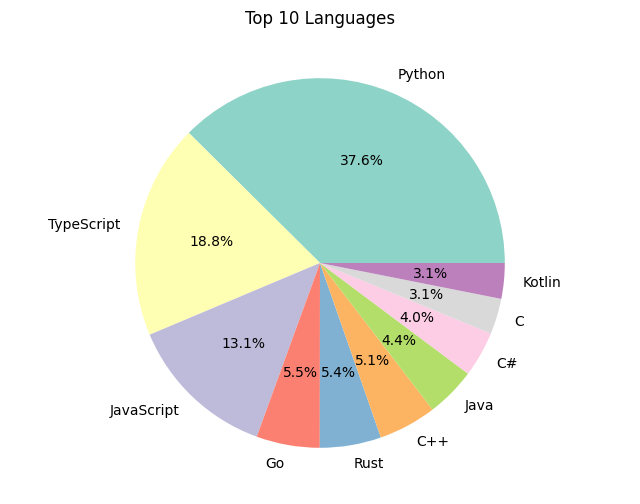

In [111]:
top_10_languages = df_langues.head(10)
# Create a pie chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set_palette("Set3")  # Set color palette
plt.title('Top 10 Languages')
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.pie(top_10_languages, labels=top_10_languages.index, autopct='%1.1f%%')
plt.show()

# Repo with high evaluations (stars)

In [112]:
df_high_stars = df_repo.nlargest(100, "stargazers_count")
df_high_stars.tail(5)

full_name  private   
5965                          oleksandrbalan/minabox    False  \
6043                            amosbastian/template    False   
843            ArisGuimera/Android-Expert-Intermedio    False   
991                         CharleeWa/openai-toolbox    False   
2152  tunds/SwiftUI-Navigation-Multiplatform-Example    False   

                                            description   
5965  Lazy box library for Jetpack Compose which all...  \
6043  A Nextjs  application with authentication and ...   
843   Nivel intermedio del curso de Android DESDE CE...   
991     A repository of OpenAI tools and resources t...   
2152  This repo a  SwiftUI app showcasing examples o...   

                    created_at                updated_at   size   
5965 2023-05-16 16:14:21+00:00 2023-06-19 15:56:27+00:00    202  \
6043 2023-05-17 21:54:40+00:00 2023-06-22 06:50:06+00:00   2044   
843  2023-03-21 13:11:58+00:00 2023-06-22 06:57:15+00:00  10126   
991  2023-03-22 14:49:15+00:00 2023-06-20 06:40:11+00:00   2976   
2152 2023-04-01 10:06:02+00:00 2023-06-21 13:45:31+00:00    423   

      stargazers_count    language  open_issues_count  forks_count owner_type   
5965               112      Kotlin                  1            7       User  \
6043               112  TypeScript                  0            3       User   
843                111      Kotlin                  0            4       User   
991                111      Python                  0           14       User   
2152               111       Swift                  0            1       User   

                                           Contributors   
5965  ['virtualsteve-star', 'GangGreenTemperTatum', ...  \
6043  ['ABaldrati', 'omedivad', 'beppefolder', 'marc...   
843                                         ['mks0601']   
991                                           ['vxfla']   
2152                             ['ExtremeElectronics']   

                                    nombre_contribution  max_contribution   
5965  [131, 14, 13, 7, 7, 5, 3, 2, 2, 2, 1, 1, 1, 1,...               131  \
6043                                       [5, 5, 1, 1]                 5   
843                                                [26]                26   
991                                                [16]                16   
2152                                               [64]                64   

        max_contributeur                                   Languages   
5965   virtualsteve-star                                  ['Kotlin']  \
6043           ABaldrati  ['TypeScript', 'JavaScript', 'CSS', 'MDX']   
843              mks0601                                  ['Kotlin']   
991                vxfla                                  ['Python']   
2152  ExtremeElectronics                                   ['Swift']   

                            frequencies  max_frequency most_frequent_language   
5965                          [33521.0]        33521.0                 Kotlin  \
6043  [288524.0, 4014.0, 2526.0, 498.0]       288524.0             TypeScript   
843                            [1336.0]         1336.0                 Kotlin   
991                             [861.0]          861.0                 Python   
2152                          [76201.0]        76201.0                  Swift   

      wtache  
5965     3.0  
6043     1.0  
843      4.0  
991      4.0  
2152     4.0

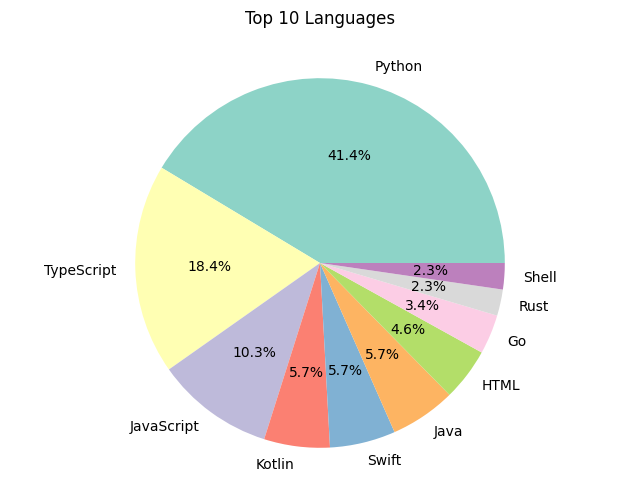

In [113]:
df1 = df_high_stars['language'].value_counts()
df1 = df1.head(10)
# Create a pie chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set_palette("Set3")  # Set color palette
plt.title('Top 10 Languages')
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.pie(df1, labels=df1.index, autopct='%1.1f%%')
plt.show()

                       size  stargazers_count  open_issues_count    wtache   
size               1.000000         -0.064006          -0.092813  0.101610  \
stargazers_count  -0.064006          1.000000           0.111658  0.065373   
open_issues_count -0.092813          0.111658           1.000000  0.242558   
wtache             0.101610          0.065373           0.242558  1.000000   
forks_count       -0.086351         -0.131020           0.028262  0.094986   

                   forks_count  
size                 -0.086351  
stargazers_count     -0.131020  
open_issues_count     0.028262  
wtache                0.094986  
forks_count           1.000000  


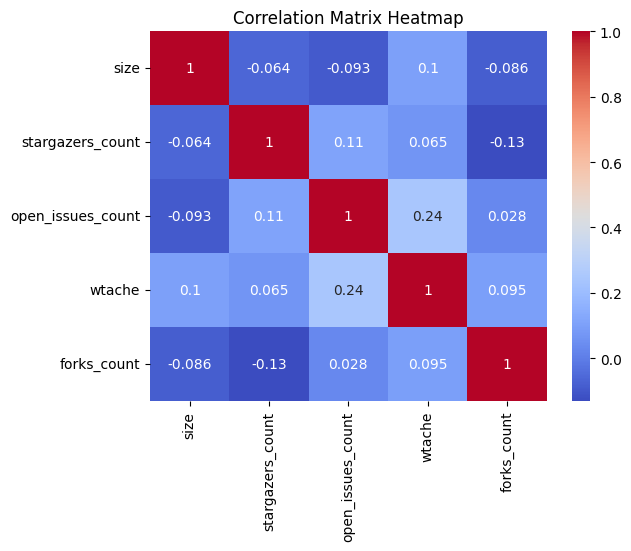

In [114]:
df_stars = df_high_stars[['size', 'stargazers_count', 'open_issues_count', 'wtache', 'forks_count' ]]

correla = df_stars.corr()
print(correla)

sns.heatmap(correla, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

# Repo with high volume

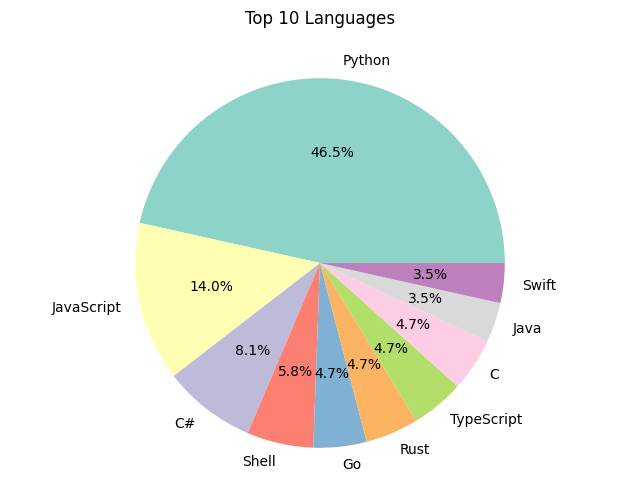

In [115]:
df_volume = df_repo.nlargest(100, "size")
df_volume.tail(5)

df2 = df_volume['language'].value_counts()
df2 = df2.head(10)
# Create a pie chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set_palette("Set3")  # Set color palette
plt.title('Top 10 Languages')
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.pie(df2, labels=df2.index, autopct='%1.1f%%')
plt.show()

                       size  stargazers_count  open_issues_count    wtache   
size               1.000000         -0.064006          -0.092813  0.101610  \
stargazers_count  -0.064006          1.000000           0.111658  0.065373   
open_issues_count -0.092813          0.111658           1.000000  0.242558   
wtache             0.101610          0.065373           0.242558  1.000000   
forks_count       -0.086351         -0.131020           0.028262  0.094986   

                   forks_count  
size                 -0.086351  
stargazers_count     -0.131020  
open_issues_count     0.028262  
wtache                0.094986  
forks_count           1.000000  


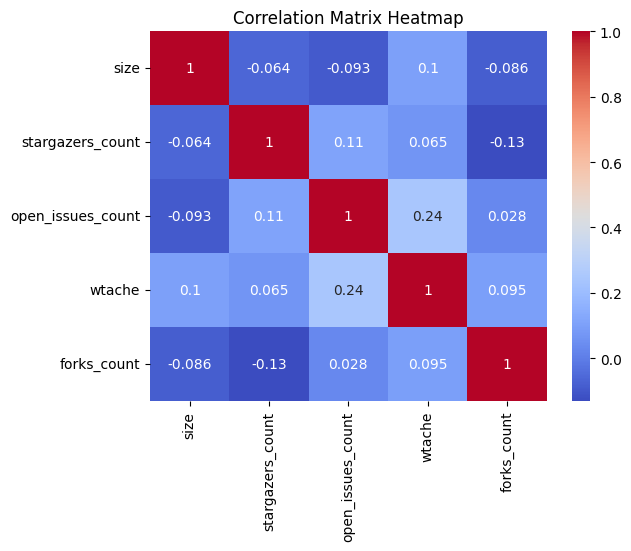

In [116]:
df_size = df_volume[['size', 'stargazers_count', 'open_issues_count', 'wtache', 'forks_count' ]]

correla = df_stars.corr()
print(correla)

sns.heatmap(correla, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [117]:
df_watcher = df_repo.nlargest(100, "wtache")
df_watcher.tail(5)

full_name  private   
5170                m5stack/M5CoreS3    False  \
5305               flurb18/AgentOoba    False   
5943                    grafana/ckit    False   
6167  rishikksh20/SoundStorm-pytorch    False   
7196  autonomousvision/nuplan_garage    False   

                                            description   
5170                             MCoreS Arduino Library  \
5305  An autonomous AI agent extension for Oobabooga...   
5943  Lightweight library for clustering and workloa...   
6167  Googles SoundStorm: Efficient Parallel Audio G...   
7196  [ARXIV] Parting with Misconceptions about Lear...   

                    created_at                updated_at  size   
5170 2023-05-04 15:05:24+00:00 2023-06-13 18:05:44+00:00   999  \
5305 2023-05-06 08:21:26+00:00 2023-06-22 01:43:26+00:00   140   
5943 2023-05-15 16:38:32+00:00 2023-06-21 09:55:06+00:00   220   
6167 2023-05-19 01:20:28+00:00 2023-06-20 23:51:09+00:00   251   
7196 2023-06-07 17:03:16+00:00 2023-06-22 06:57:49+00:00  7013   

      stargazers_count language  open_issues_count  forks_count    owner_type   
5170                29        C                  3           12  Organization  \
5305               115   Python                  7            8          User   
5943                12       Go                  2            3  Organization   
6167                68   Python                  3            5          User   
7196                41   Python                  0            2  Organization   

                                           Contributors nombre_contribution   
5170  ['saulpw', 'dovinmu', 'anjakefala', 'cthulahoo...   [213, 47, 41, 33]  \
5305                                        ['Santzes']                [10]   
5943       ['rfratto', 'dependabot[bot]', 'tpaschalis']         [70, 14, 5]   
6167                                        ['suvansh']                [40]   
7196                                       ['Den4ikAI']                [15]   

      max_contribution max_contributeur            Languages   
5170               213           saulpw         ['C', 'C++']  \
5305                10          Santzes           ['Python']   
5943                70          rfratto   ['Go', 'Makefile']   
6167                40          suvansh           ['Python']   
7196                15         Den4ikAI  ['Python', 'Shell']   

                frequencies  max_frequency most_frequent_language  wtache  
5170  [3413202.0, 388664.0]      3413202.0                      C    13.0  
5305              [28483.0]        28483.0                 Python    13.0  
5943       [132338.0, 54.0]       132338.0                     Go    13.0  
6167              [95825.0]        95825.0                 Python    13.0  
7196     [241565.0, 3669.0]       241565.0                 Python    13.0

# Watchers

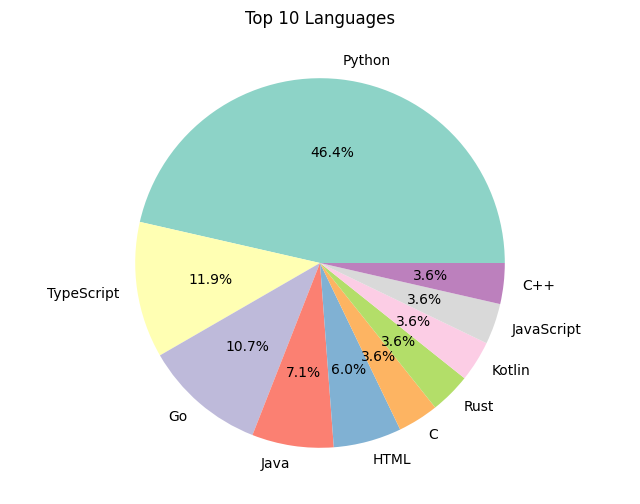

In [118]:

dt1 = df_watcher['language'].value_counts()
dt1 = dt1.head(10)
# Create a pie chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set_palette("Set3")  # Set color palette
plt.title('Top 10 Languages')
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.pie(dt1, labels=dt1.index, autopct='%1.1f%%')
plt.show()

# Forks

In [119]:
df_forks = df_repo.nlargest(100, "forks_count")
df_forks.tail(5)

full_name  private   
5894             techaddict0x/airdrop    False  \
699               hepingood/ir_remote    False   
1355                  3kh0/soundboard    False   
1596             hillis/gpt-4-chat-ui    False   
2939  subhashis2204/project-annapurna    False   

                                            description   
5894  Airdrop website with tasks required to become ...  \
699   NEC IR remote decode full function driver for ...   
1355  Simple yet powerful online soundboard app that...   
1596  This project is a simple Reactbased chat inter...   
2939           This is the project annapurna repository   

                    created_at                updated_at   size   
5894 2023-05-14 13:35:27+00:00 2023-06-14 19:40:27+00:00    604  \
699  2023-03-20 16:52:39+00:00 2023-05-20 23:52:57+00:00   2262   
1355 2023-03-24 04:49:45+00:00 2023-05-24 04:59:29+00:00  19334   
1596 2023-03-27 16:25:01+00:00 2023-06-20 20:41:22+00:00    342   
2939 2023-04-08 14:20:46+00:00 2023-06-20 19:14:23+00:00   1954   

      stargazers_count    language  open_issues_count  forks_count owner_type   
5894                14    Solidity                  0           31       User  \
699                100           C                  0           30       User   
1355                12  JavaScript                  0           30       User   
1596                52  TypeScript                  4           30       User   
2939                13         EJS                 66           30       User   

            Contributors nombre_contribution  max_contribution   
5894    ['techaddict0x']                 [3]                 3  \
699         ['e-younan']                [69]                69   
1355     ['Misaka-blog']                 [7]                 7   
1596       ['tombo1337']                [14]                14   
2939  ['Andrew-Tsegaye']                [39]                39   

     max_contributeur                                          Languages   
5894     techaddict0x                               ['Solidity', 'HTML']  \
699          e-younan  ['C', 'Assembly', 'CMake', 'Makefile', 'Batchf...   
1355      Misaka-blog                             ['JavaScript', 'HTML']   
1596        tombo1337                ['TypeScript', 'CSS', 'JavaScript']   
2939   Andrew-Tsegaye                       ['EJS', 'JavaScript', 'CSS']   

                                        frequencies  max_frequency   
5894                              [58056.0, 1478.0]        58056.0  \
699   [12912413.0, 49259.0, 11510.0, 3988.0, 326.0]     12912413.0   
1355                               [3909.0, 3718.0]         3909.0   
1596                        [8184.0, 4548.0, 253.0]         8184.0   
2939                     [145366.0, 98900.0, 218.0]       145366.0   

     most_frequent_language  wtache  
5894               Solidity     2.0  
699                       C    11.0  
1355             JavaScript     1.0  
1596             TypeScript     5.0  
2939                    EJS     2.0

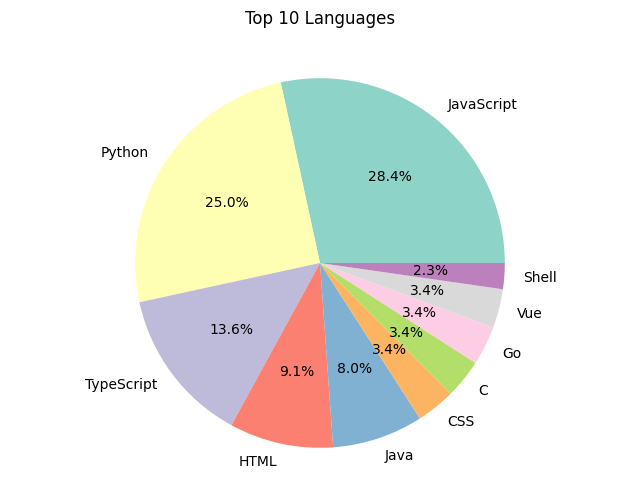

In [120]:
dt2 = df_forks['language'].value_counts()
dt2 = dt2.head(10)
# Create a pie chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set_palette("Set3")  # Set color palette
plt.title('Top 10 Languages')
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.pie(dt2, labels=dt2.index, autopct='%1.1f%%')
plt.show()

# Issues

In [121]:
df_issue = df_repo.nlargest(100, "open_issues_count")
df_issue.tail(5)

full_name  private   
6257                   jalallinux/laravel-thingsboard    False  \
143   IIC2613-Inteligencia-Artificial-2023-1/Syllabus    False   
257                                 nostr-dev-kit/ndk    False   
371                      GregTechCEu/GregTechCEu-1.19    False   
857                  northword/zotero-format-metadata    False   

                                            description   
6257                         ThingsBoard laravel client  \
143   Repositorio base del curso donde se publicarán...   
257     Nostr Development Kit with gossipstyle behavior   
371              GregTech CE Unofficial for  and beyond   
857   An addon for Zotero to format item metadata Sh...   

                    created_at                updated_at   size   
6257 2023-05-20 08:12:31+00:00 2023-06-17 07:05:32+00:00    888  \
143  2023-03-15 03:30:31+00:00 2023-05-31 15:53:23+00:00  15372   
257  2023-03-16 17:55:15+00:00 2023-06-21 22:24:21+00:00    926   
371  2023-03-17 15:53:18+00:00 2023-06-21 08:35:45+00:00  10883   
857  2023-03-21 12:08:30+00:00 2023-06-16 04:17:08+00:00   8731   

      stargazers_count    language  open_issues_count  forks_count   
6257                26         PHP                 20            0  \
143                 46      Python                 19            1   
257                 96  TypeScript                 19           19   
371                 91        Java                 19           31   
857                 57  TypeScript                 19            2   

        owner_type                                       Contributors   
6257          User  ['jalallinux', 'samirsabiee', 'ehsanmqn', 'dep...  \
143   Organization  ['CGR0', 'dfloreaa', 'Benyo27', 'Borjampm', 'B...   
257   Organization                           ['chn-lee-yumi', 'oiuv']   
371   Organization                                     ['iDev-Games']   
857           User                                    ['heoseongjin']   

              nombre_contribution  max_contribution max_contributeur   
6257          [486, 172, 4, 4, 4]               486       jalallinux  \
143   [6, 4, 1, 1, 1, 1, 1, 1, 1]                 6             CGR0   
257                       [87, 3]                87     chn-lee-yumi   
371                          [97]                97       iDev-Games   
857                          [15]                15      heoseongjin   

                                              Languages   
6257                                            ['PHP']  \
143                                ['Jupyter Notebook']   
257                 ['TypeScript', 'CSS', 'JavaScript']   
371                                            ['Java']   
857   ['TypeScript', 'HTML', 'JavaScript', 'Fluent',...   

                                            frequencies  max_frequency   
6257                                         [603214.0]       603214.0  \
143                                         [2536021.0]      2536021.0   
257                            [133550.0, 677.0, 183.0]       133550.0   
371                                         [4078167.0]      4078167.0   
857   [7415066.0, 671680.0, 9038.0, 4981.0, 2787.0, ...      7415066.0   

     most_frequent_language  wtache  
6257                    PHP     1.0  
143                  Python     2.0  
257              TypeScript    10.0  
371                    Java     7.0  
857              TypeScript     1.0

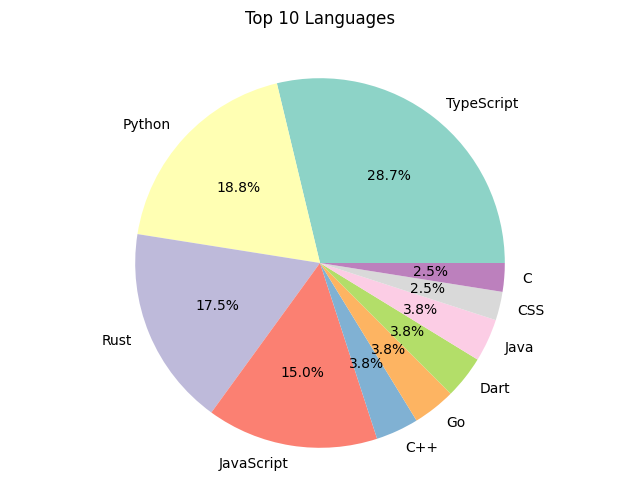

In [122]:
dt3 = df_issue['language'].value_counts()
dt3 = dt3.head(10)
# Create a pie chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set_palette("Set3")  # Set color palette
plt.title('Top 10 Languages')
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.pie(dt3, labels=dt3.index, autopct='%1.1f%%')
plt.show()

# Description

In [123]:
df_descrip = df_repo.loc[df_repo['language'] == 'Python']
df_descrip.dropna(inplace=True)
df_descrip.shape

C:\Users\Youcode\AppData\Local\Temp\ipykernel_107796\3741171070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descrip.dropna(inplace=True)


(2257, 20)

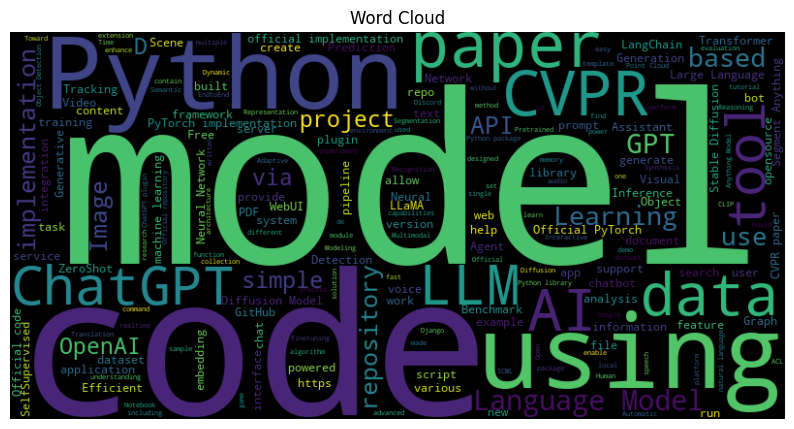

In [124]:
# Combine all the descriptions into a single string
text = ' '.join(df_descrip['description'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

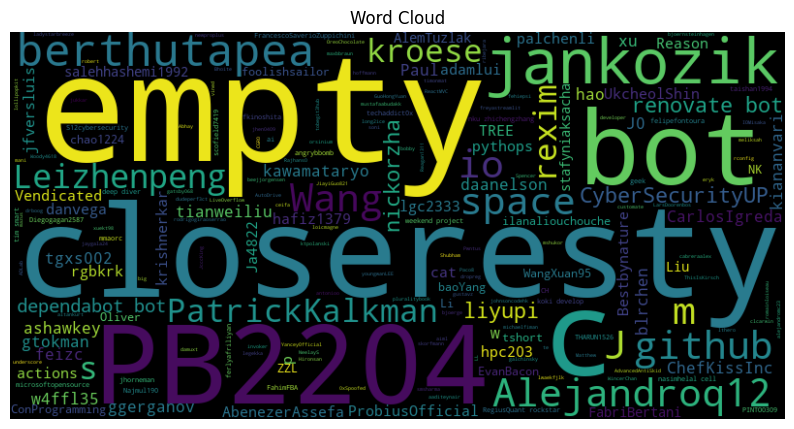

In [125]:
# Combine all the descriptions into a single string
text = ' '.join(df_descrip['max_contributeur'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [126]:
df_descrip1 = df_repo.loc[df_repo['language'] == 'JavaScript']
df_descrip1.dropna(inplace=True)
df_descrip1.shape

C:\Users\Youcode\AppData\Local\Temp\ipykernel_107796\146835355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descrip1.dropna(inplace=True)


(787, 20)

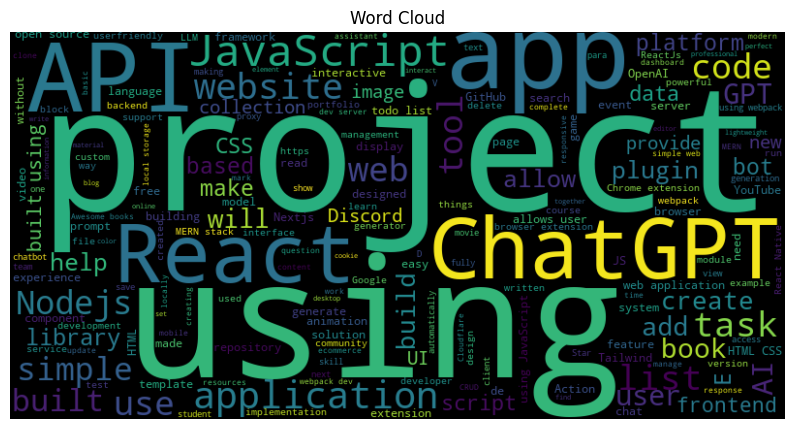

In [127]:
# Combine all the descriptions into a single string
text = ' '.join(df_descrip1['description'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

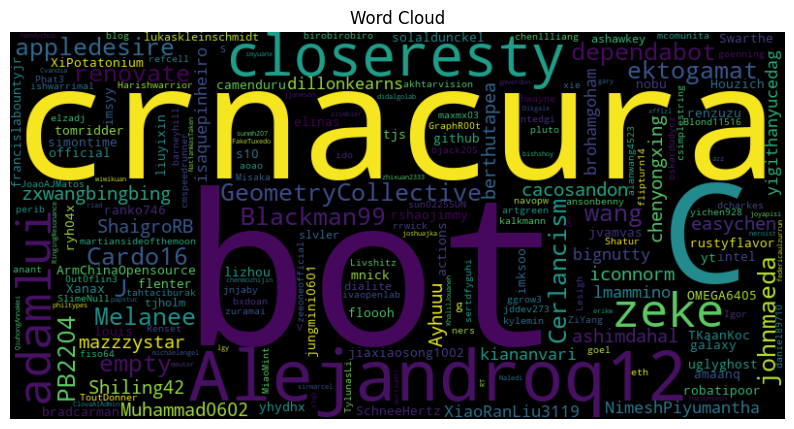

In [128]:
# Combine all the descriptions into a single string
text = ' '.join(df_descrip1['max_contributeur'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

C:\Users\Youcode\AppData\Local\Temp\ipykernel_107796\2541522850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descrip2.dropna(inplace=True)


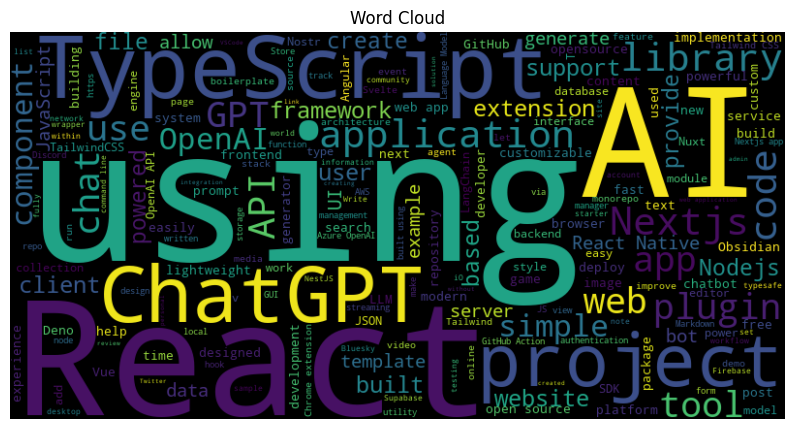

In [129]:
df_descrip2 = df_repo.loc[df_repo['language'] == 'TypeScript']
df_descrip2.dropna(inplace=True)
df_descrip2.shape
# Combine all the descriptions into a single string
text = ' '.join(df_descrip2['description'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

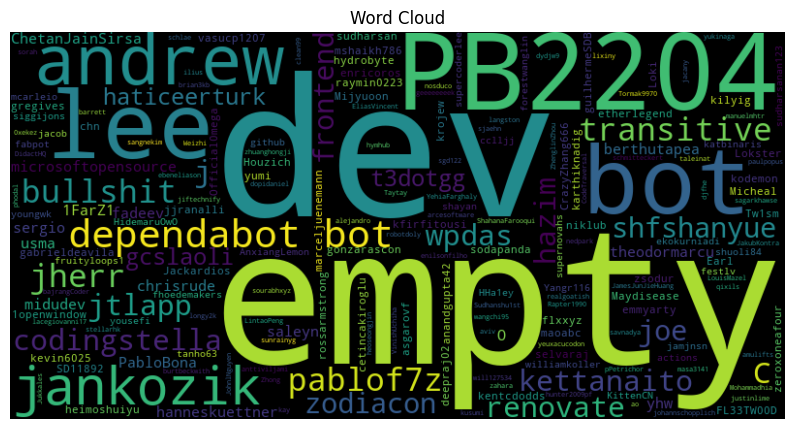

In [130]:
# Combine all the descriptions into a single string
text = ' '.join(df_descrip2['max_contributeur'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

C:\Users\Youcode\AppData\Local\Temp\ipykernel_107796\3438226724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descrip3.dropna(inplace=True)


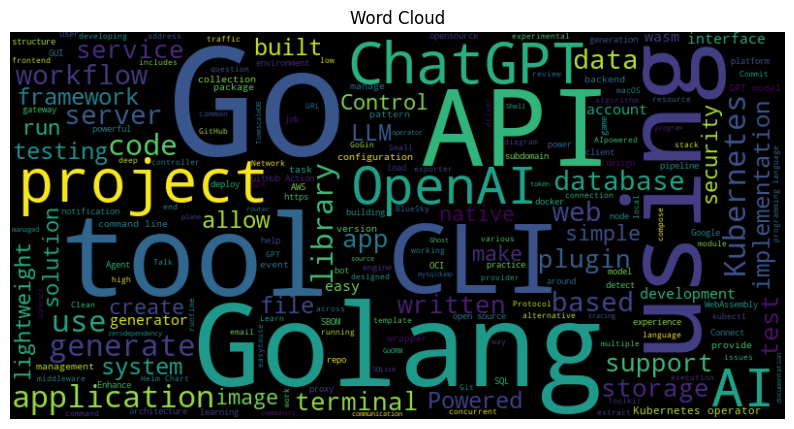

In [131]:
df_descrip3 = df_repo.loc[df_repo['language'] == 'Go']
df_descrip3.dropna(inplace=True)
df_descrip3.shape
# Combine all the descriptions into a single string
text = ' '.join(df_descrip3['description'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

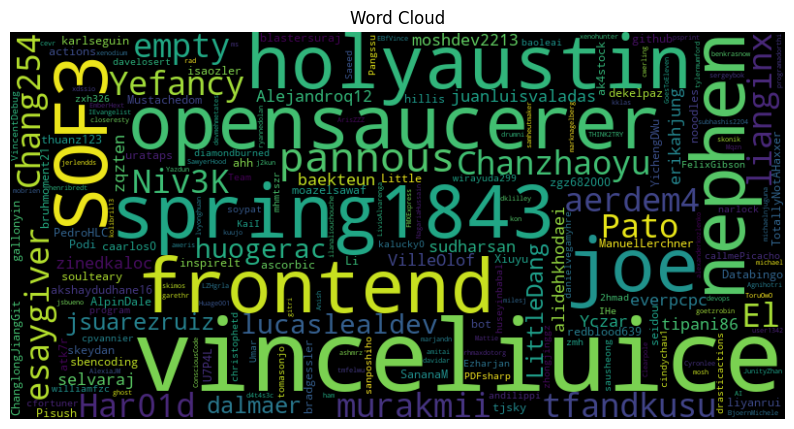

In [132]:
# Combine all the descriptions into a single string
text = ' '.join(df_descrip3['max_contributeur'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

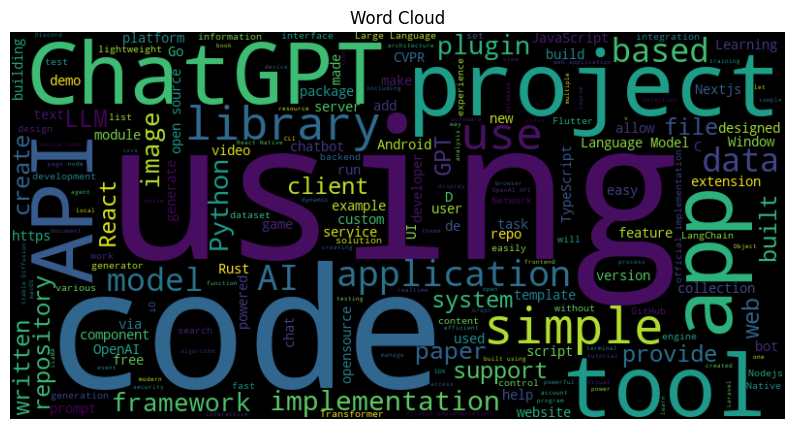

In [133]:
# Combine all the descriptions into a single string
text = ' '.join(df_repo['description'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

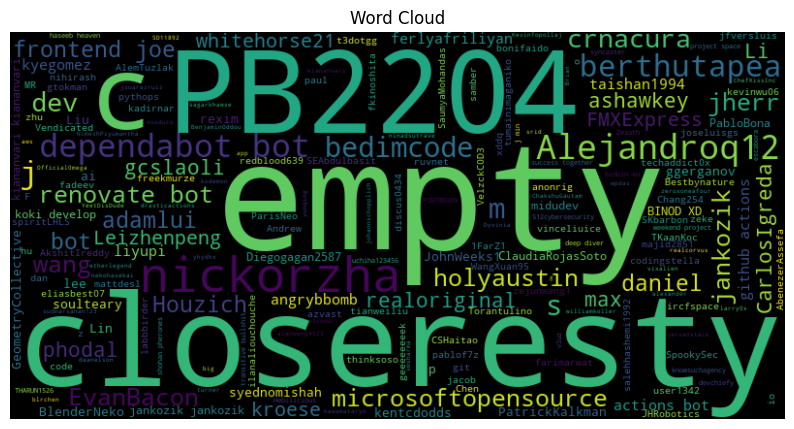

In [134]:
# Combine all the descriptions into a single string
text = ' '.join(df_repo['max_contributeur'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Statistics Descriptions

In [135]:
df_repo.describe()

size  stargazers_count  open_issues_count  forks_count   
count   7580.000000       7580.000000        7580.000000  7580.000000  \
mean    3427.699340         29.472559           2.058575     4.621900   
std     5066.246247         24.369937          11.159320    28.132793   
min      100.000000         10.000000           0.000000     0.000000   
25%      311.000000         13.000000           0.000000     0.000000   
50%     1044.500000         19.000000           0.000000     2.000000   
75%     4184.000000         36.000000           2.000000     4.000000   
max    23610.000000        121.000000         580.000000  2004.000000   

       max_contribution  max_frequency       wtache  
count       7580.000000   7.580000e+03  7580.000000  
mean          57.103694   4.621840e+05     2.916095  
std          175.730548   2.345071e+06     2.903620  
min            0.000000   1.000000e+00     0.000000  
25%            9.000000   1.836875e+04     1.000000  
50%           24.000000   5.583700e+04     2.000000  
75%           58.000000   1.751940e+05     4.000000  
max         8666.000000   5.697637e+07    30.000000

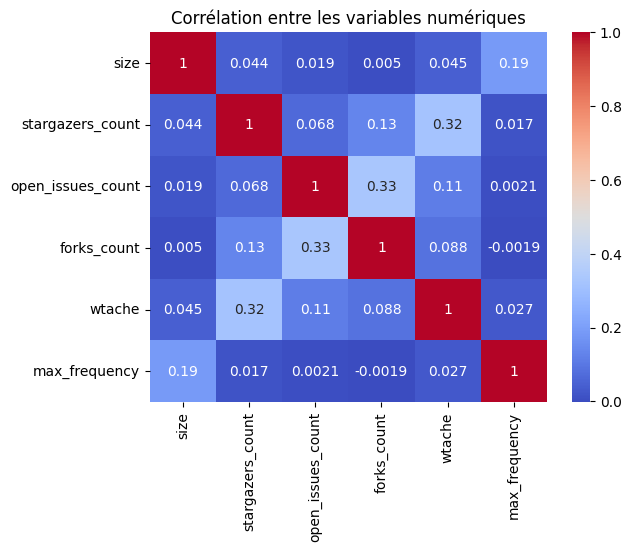

In [136]:
correlation_matrix = df_repo[['size', 'stargazers_count', 'open_issues_count', 'forks_count', 'wtache', 'max_frequency']] .corr()

# Affichage de la matrice de corrélation
#print(correlation_matrix)

# Visualisation avec une heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation entre les variables numériques')
plt.show()

In [ ]:
sns.pairplot(df_repo, hue='language')
plt.show()